## __Importing Necessary Libraries__ 


In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



# __Data Preprocessing__

In [2]:
df = pd.read_csv("C:\\Users\\Omkar\\Downloads\\iris flower classification\\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop("Id",axis=1,inplace=True)

In [5]:
df.colums=['Sepal_length','Sepal_width','Petal_length','Petal_Width','species']

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

# **Data Visualization**

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

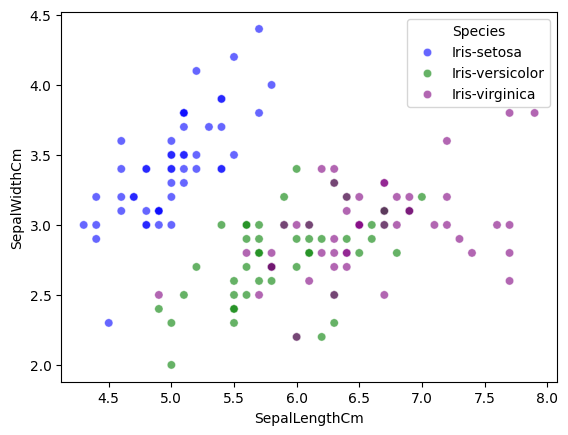

In [11]:
colors = ['Blue','Green','Purple']
sns.scatterplot(df, x="SepalLengthCm", y="SepalWidthCm",palette = colors, hue='Species',alpha=0.6, zorder= 3)

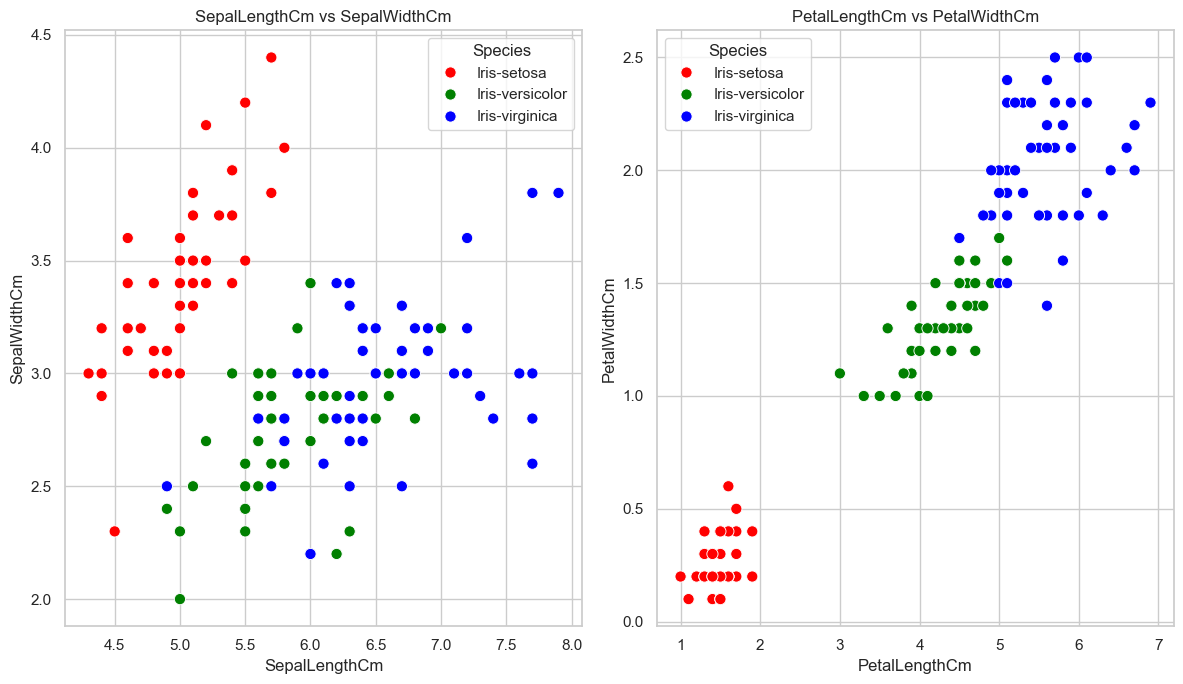

In [11]:
colors = ["Red","Green","Blue"]
variable_pairs = [('SepalLengthCm','SepalWidthCm'), ('PetalLengthCm','PetalWidthCm')]

sns.set(style="whitegrid")
sns.set_palette(colors)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,7))
ax1, ax2 = axes

for i, pair in enumerate(variable_pairs):
    sns.scatterplot(x=pair[0], y=pair[1], hue='Species', data=df, s=65, ax=axes[i])

    axes[i].set_title(f'{pair[0]} vs {pair[1]}')
    axes[i].set_xlabel(pair[0]) 
    axes[i].set_ylabel(pair[1])

plt.tight_layout()
plt.show()

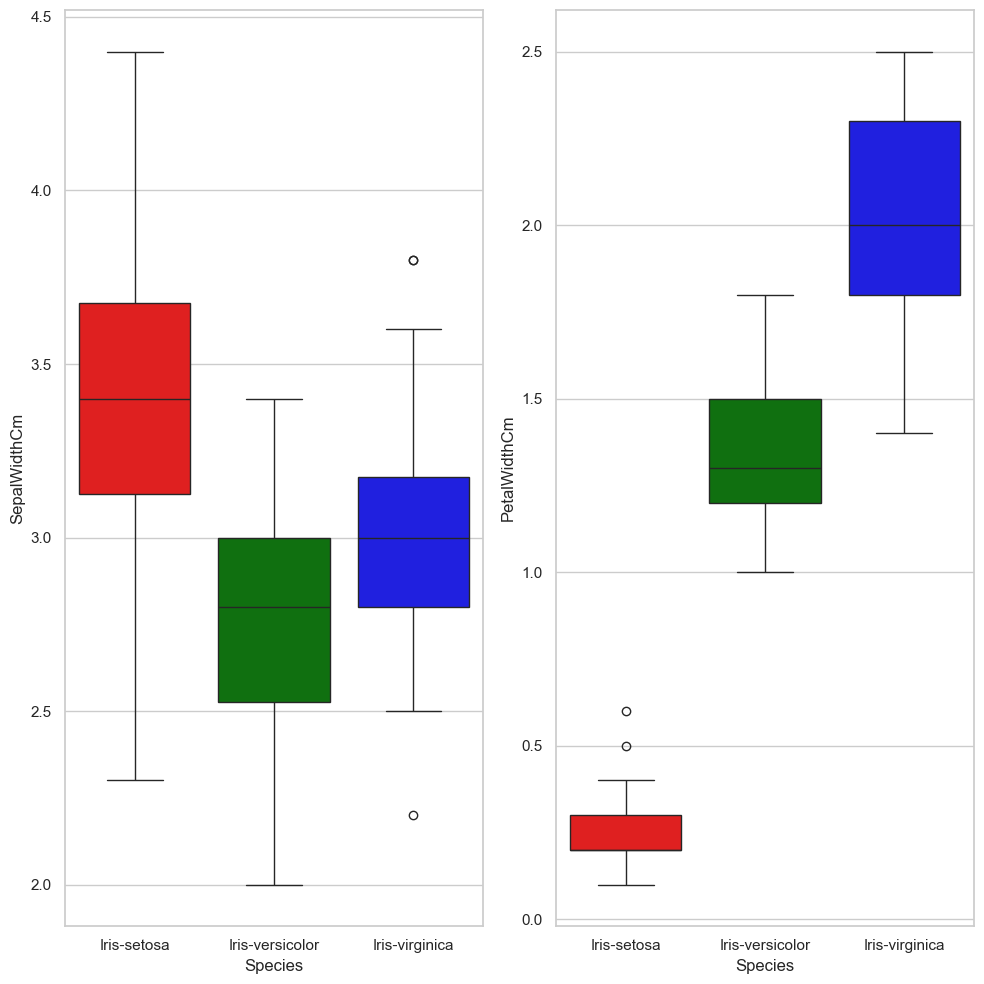

In [12]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

for i,pair in enumerate(variable_pairs):
    sns.boxplot(x='Species', y=pair[1], data=df, hue='Species', ax=axes[i])


plt.tight_layout()

plt.show()

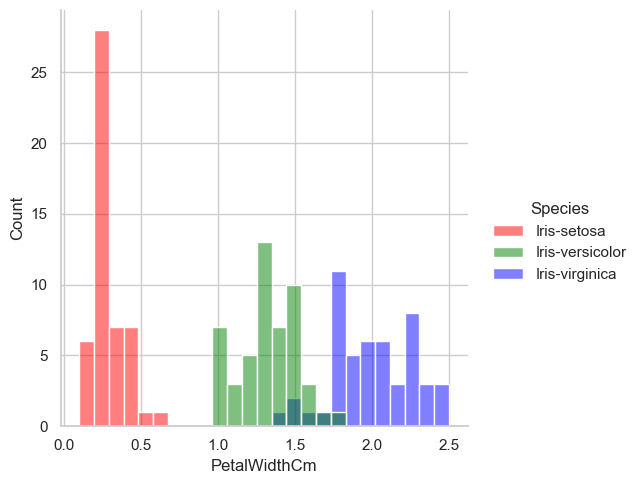

In [13]:
sns.displot(df, x='PetalWidthCm', hue='Species', kind='hist', bins=25, palette=colors)

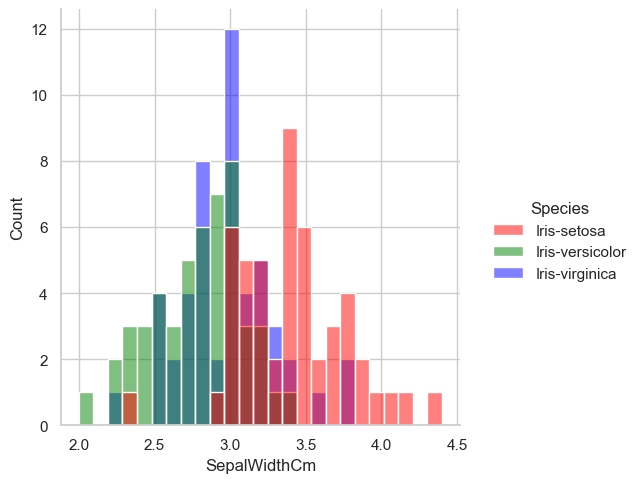

In [14]:
sns.displot(df, x='SepalWidthCm', hue='Species', kind='hist', bins=25, palette=colors)

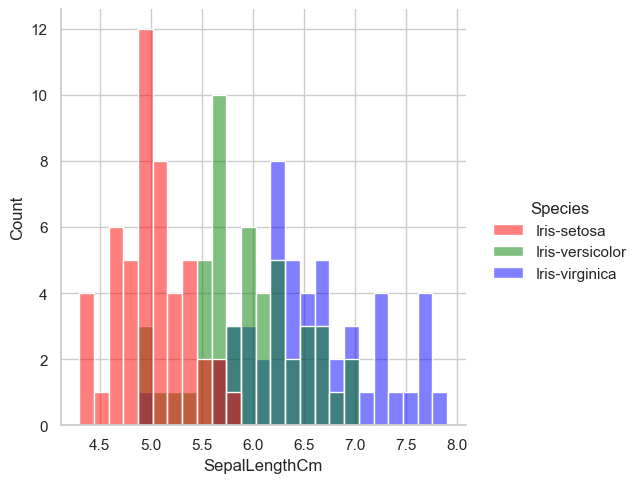

In [15]:
sns.displot(df, x='SepalLengthCm', hue='Species', kind='hist', bins=25, palette=colors)

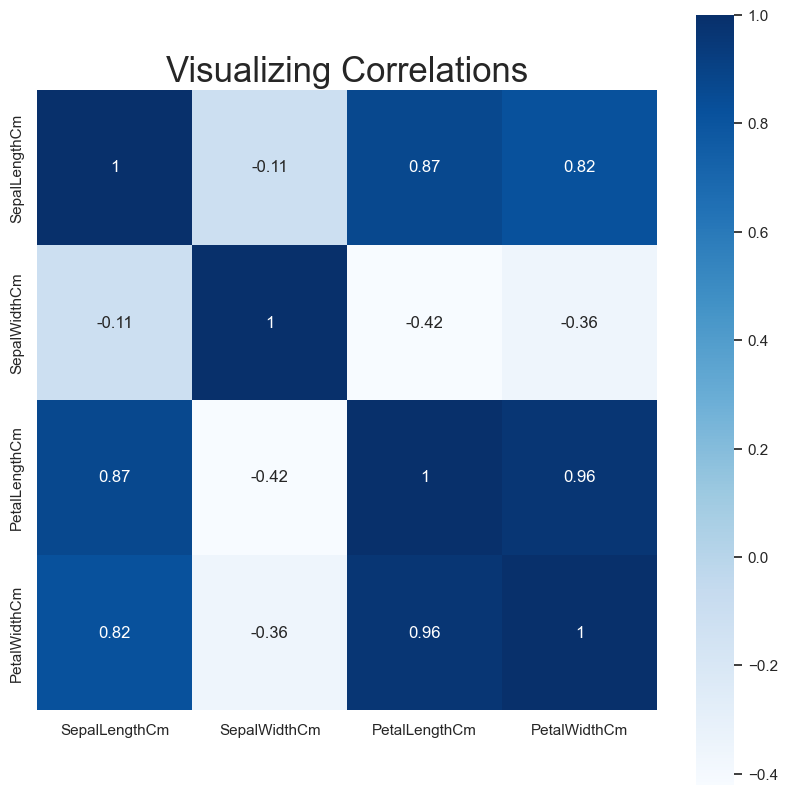

In [53]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', square=True, annot=True)
plt.title("Visualizing Correlations", size=25)
plt.show()

# **Spliting the Data into Train and Test Dataset**

In [50]:
x = df.drop(['Species'],axis = 1)
y = df['Species']

# **Encoding the Species Column to train our Model**

In [51]:
y=y.map({"Iris-setosa":1,"Iris-virginica":2,"Iris-versicolor":3})
y

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, shuffle=True)

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
acc_lr = lr.score(x_test,y_test)
print("The accuracy for Logistic Regression is: ", acc_lr* 100,"%")

The accuracy for Logistic Regression is:  90.0 %


In [60]:
cl_rep=classification_report(y_test,y_pred)

In [64]:
print("\nThe classification report for "+" Logistic Regression is:", cl_rep,sep = "\n")


The classification report for  Logistic Regression is:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.82      0.90      0.86        10
           3       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



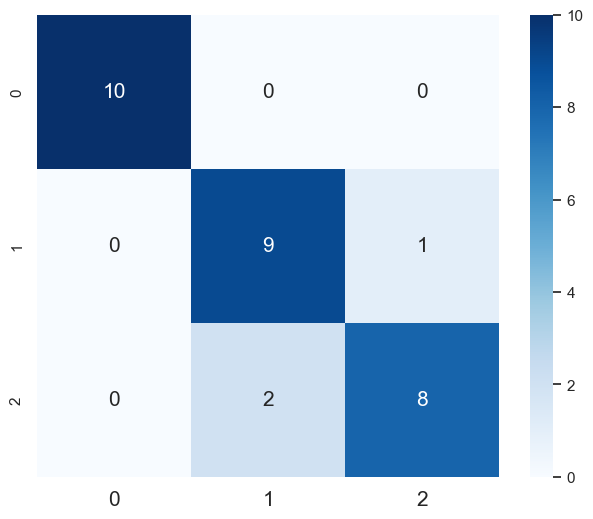

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True , cmap = 'Blues',annot_kws ={'size':15},square = True)
plt.xticks(size=15)
plt.xticks(size=15)    
plt.show()

# **End of Project**